<a href="https://colab.research.google.com/github/yuvalkabeli/GoogleColabProjects/blob/main/Unsupervised_Learning_on_Iris_Data_(Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preperation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe.data
  y = dataframe.target
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)


  return X, y

In [ ]:
data = load_iris()
X, y = scale_dataset(data)
X = np.delete(X, -3, axis=1)
columns = data.feature_names +['species']
df = pd.DataFrame(data, columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species


#KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model = kmeans_model.fit(X)
clusters = kmeans_model.labels_
feature_names = [f'feature{i}' for i in range(X.shape[1])]

# Creating a DataFrame with features and a 'class' column for clusters
cluster_df = pd.DataFrame(X, columns=feature_names)
cluster_df['class'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

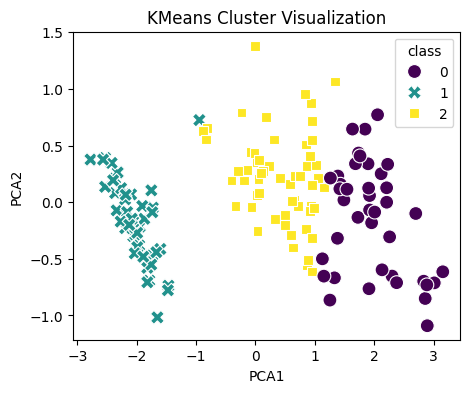

In [ ]:
# Add the PCA components to cluster_df
cluster_df['PCA1'] = X_pca[:, 0]
cluster_df['PCA2'] = X_pca[:, 1]

# Plot sns
plt.figure(figsize=(5, 4))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='class', palette='viridis', style='class', s=100)
plt.title('KMeans Cluster Visualization')
plt.show()

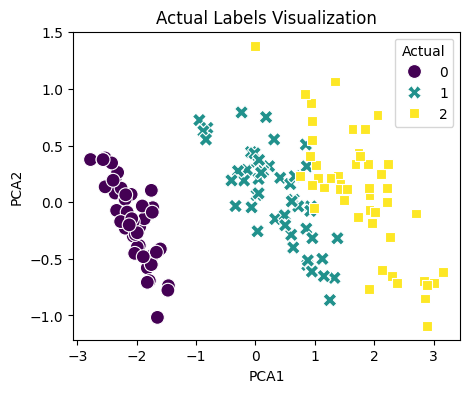

In [ ]:
# Assuming y contains actual labels
cluster_df['Actual'] = y

# Plotting actual labels for comparison
plt.figure(figsize=(5, 4))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Actual', palette='viridis', style='Actual', s=100)
plt.title('Actual Labels Visualization')
plt.show()

In [ ]:
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster Sizes:", cluster_sizes)

# Compare with actual group sizes if known (assuming 'y' contains actual labels)
actual_sizes = dict(zip(*np.unique(y, return_counts=True)))
print("Actual Group Sizes:", actual_sizes)

Cluster Sizes: {0: 41, 1: 51, 2: 58}
Actual Group Sizes: {0: 50, 1: 50, 2: 50}


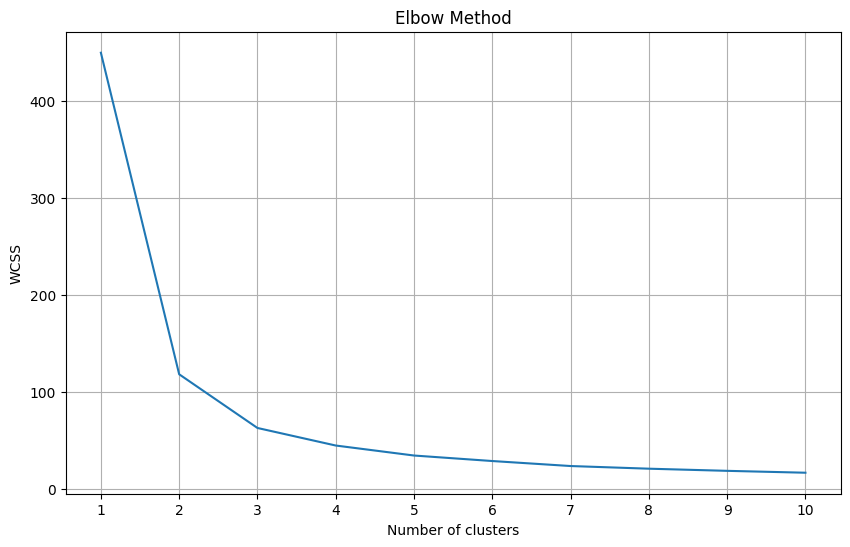

In [ ]:
wcss = []  # List to hold the within-cluster sum of squares

# Try different numbers of clusters
for i in range(1, 11):  # For example, testing 1 through 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the model

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()